# Capstone Project - The Battle of Tokyo Wards (Week 2)

#### Chonlawit Sirikupt
#### 30.01.2021

![title](tokyoalley2.jpg)

## Week 1 Assignment Objectives: 
##### 1) Define a problem for your capstone project.
##### 2) Finding the data that you will use for the capstone project.


### Introduction and Background of the Business Problem

As the world's largest and most populated metropolis, Tokyo has a lot to offer in a myriad number of ways. One of the most exciting aspects is the dining experience. Tokyo features a full spectrum of both local and regional Japanese cuisine in addition to all types of international fare. From cheap hole-in-the-wall joints in the alleyways to expensive high-class restaurants on Roppongi Hills, delicious food can be found in every corner of the city with virtually every budget in between.

**Business problem**: A fictitious start-up tour company called _**2 Rice 1 Sake**_ plans to sharpen its food guide in order to attract young and older foreign tourists who want to go on a fun food escapade in and around Tokyo. The firm was recently established and has few contacts on the ground. _**2 Rice 1 Sake**_ has requested an initial exploratory study on Tokyo's different wards and their features so that it can choose where to focus their food tours in in the later stages of project formulation. Specifically, the client wants  to obtain a broad picture of the kinds of restaurants that are popular and most frequented in different neighborhoods. The client is not interested in other recreational venues like parks, game centers, or sports facilities.

To fulfill the client's demands, I will use **Foursquare location data** and **K-Means clustering methods** to group Tokyo's 23 districts into their categories based on their restaurant venues information. To provide an additional depth to the picture that would be beneficial for our client's planning, I will also conduct a secondary analysis that uses data on **celebrity visits to Tokyo** in order to group the districts into categories based on the restaurant venues where prominent celebrities such as Tyler the Creator and Anthony Bourdain have dined out.

### --- Proof that Tyler was there ;) ---

In [279]:
class Tweet(object):
    def __init__(self, embed_str=None):
        self.embed_str = embed_str

    def _repr_html_(self):
        return self.embed_str

s = ("""
<blockquote class="twitter-tweet"><p lang="tl" dir="ltr">TOKYO, JAPAN <a href="https://t.co/p2L7Z0RUdx">pic.twitter.com/p2L7Z0RUdx</a></p>&mdash; Tyler, The Creator (@tylerthecreator) <a href="https://twitter.com/tylerthecreator/status/905083949033984002?ref_src=twsrc%5Etfw">September 5, 2017</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")

Tweet(s)

### Data Requirement 

##### The following data will be central to the project:

* **List of Tokyo wards (districts) including their coordinates (longitude and latitude)**

Data source: https://en.wikipedia.org/wiki/Special_wards_of_Tokyo#List_of_special_wards

_Description:_ The neighborhood data will be scraped from Wikipedia in order to produce a dataframe that shows key details about each of the 23 wards that exists in Tokyo. The coordinates of the 23 major wards will be obtained using the geocoder class of Geopy client. 

* **Types of restaurants in each ward** 

Data source: Foursquare API

_Description:_ The API key will be used to access all possible venues located in each ward. Only restaurant venues will be filtered given that our client wants prioritizes food tours above all else. We will then use K-Means clustering to cluster them into different groups for analysis.

* **Prominent celebrities and locations of their dine-outs in Tokyo**

Data source: https://www.kaggle.com/alnguyen22/celebrities-in-tokyo

_Description:_ After the dining-out features of each ward has been determined, this dataset will be imported and the exploratory analysis will be replicated. The dataset, which contain details about which celebrities visited Tokyo and the locations they had dined out during their stay, will be merged with the previous dataframe. We will filter out the celebrities, the restaurants they dined at, and the locations of the latter. 

## Structure and Methods for the Exploratory Study 

This exploratory study consists of **two main parts**. 

**Part 1** maps out  types of popular restaurant venues in Tokyo after leveraging data on Tokyo wards from Wikipedia and geocoder class of the geopy library, as well as Foursquare API. After the initial exploratory analysis, I adopt K-means clustering as a method for grouping types of popular restaurants into their respective categories. The end result is a greater understanding of the primary clusters of restaurant venues in Tokyo that are most commonly frequented. I make observations and provide recommendations that would help the client focus on a specific niche when going forward to formulating a marketing strategy. 

**Part 2** replicates the same methodology in Part 1 with the data set on celebrity visits to Tokyo obtained from Kaggle. The end result of this secondary analysis enhances the previous analysis by providing the client with a greater understanding of the popularity of some Tokyo wards that managed to attract prominent celebrities. The client might want to utilize the findings to select areas or restaurant venues where clebrities have visited when formulating his or her marketing strategy in the future in ways that complement the findings in Part 1. 

### Part 1 - Mapping Popular Restaurant Venues in Tokyo

##### I: Data Preparation and Cleaning

I import the core libraries (pandas, numpy, wikipedia, and requests) that will be used to scrape the list of Tokyo's 23 wards and convert it into a dataframe. After the initial dataframe has been created, it will be cleaned and will consist of five columns: Number, Name, Population, Density, and Area.

In [280]:
import pandas as pd 
import numpy as np 
import wikipedia as wp
import requests

In [281]:
df_tokyowards = pd.read_html('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo#List_of_special_wards')[3]
df_tokyowards

,No.,Flag,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,01,NaN,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,NaN,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,NaN,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"
5,06,NaN,Taitō,台東区,200486,19830,10.11,"Ueno, Asakusa"
6,07,NaN,Sumida,墨田区,260358,18910,13.77,"Kinshichō, Morishita, Ryōgoku"
7,08,NaN,Kōtō,江東区,502579,12510,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,..."
8,09,NaN,Shinagawa,品川区,392492,17180,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,..."
9,10,NaN,Meguro,目黒区,280283,19110,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai"


The last row 'Overall' is additional information that has the potential to produce analytical confusion if we count them as part of the dataframe. Moreover, the columns 'Flag' and 'Major districts' will also be removed to make the dataframe look more organized. The cleaned dataframe will be called clean_tokyo_wards.

In [282]:
clean_tokyo_wards = df_tokyowards.drop([23, 1])
clean_tokyo_wards

,No.,Flag,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,01,NaN,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
2,03,NaN,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"
5,06,NaN,Taitō,台東区,200486,19830,10.11,"Ueno, Asakusa"
6,07,NaN,Sumida,墨田区,260358,18910,13.77,"Kinshichō, Morishita, Ryōgoku"
7,08,NaN,Kōtō,江東区,502579,12510,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,..."
8,09,NaN,Shinagawa,品川区,392492,17180,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,..."
9,10,NaN,Meguro,目黒区,280283,19110,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai"
10,11,NaN,Ōta,大田区,722608,11910,60.66,"Ōmori, Kamata, Haneda, Den-en-chōfu"


In [283]:
clean_tokyo_wards.drop(['Flag', 'Major districts'], axis=1, inplace=True)

In [284]:
clean_tokyo_wards.head(10)

,No.,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2)
0,01,Chiyoda,千代田区,59441,5100,11.66
2,03,Minato,港区,248071,12180,20.37
3,04,Shinjuku,新宿区,339211,18620,18.22
4,05,Bunkyō,文京区,223389,19790,11.29
5,06,Taitō,台東区,200486,19830,10.11
6,07,Sumida,墨田区,260358,18910,13.77
7,08,Kōtō,江東区,502579,12510,40.16
8,09,Shinagawa,品川区,392492,17180,22.84
9,10,Meguro,目黒区,280283,19110,14.67
10,11,Ōta,大田区,722608,11910,60.66


In [285]:
clean_tokyo_wards.shape

(22, 6)

##### II: Obtaining the Longitude and Latitude of Each Ward in Tokyo

I import the geocoder class from the geopy library to extract coordinates of each ward in Tokyo. Each of the data will be appended to the clean_tokyo_wards dataframe. The column 'Name' will be changed to 'Ward' in order to be consistent wit hthe values in each index.

In [286]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = "Tokyo_explorer")

In [287]:
clean_tokyo_wards['city_coord'] = clean_tokyo_wards['Name'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
clean_tokyo_wards

,No.,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),city_coord
0,01,Chiyoda,千代田区,59441,5100,11.66,"(35.6938097, 139.7532163)"
2,03,Minato,港区,248071,12180,20.37,"(35.6432274, 139.7400553)"
3,04,Shinjuku,新宿区,339211,18620,18.22,"(35.6937632, 139.7036319)"
4,05,Bunkyō,文京区,223389,19790,11.29,"(35.71881, 139.744732)"
5,06,Taitō,台東区,200486,19830,10.11,"(35.71745, 139.790859)"
6,07,Sumida,墨田区,260358,18910,13.77,"(35.700429, 139.805017)"
7,08,Kōtō,江東区,502579,12510,40.16,"(35.649154, 139.81279)"
8,09,Shinagawa,品川区,392492,17180,22.84,"(35.599252, 139.73891)"
9,10,Meguro,目黒区,280283,19110,14.67,"(35.62125, 139.688014)"
10,11,Ōta,大田区,722608,11910,60.66,"(35.561206, 139.715843)"


In [288]:
clean_tokyo_wards[['Latitude', 'Longitude']] = clean_tokyo_wards['city_coord'].apply(pd.Series)

clean_tokyo_wards.drop(['city_coord'], axis=1, inplace=True)
clean_tokyo_wards

,No.,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Latitude,Longitude
0,01,Chiyoda,千代田区,59441,5100,11.66,35.693810,139.753216
2,03,Minato,港区,248071,12180,20.37,35.643227,139.740055
3,04,Shinjuku,新宿区,339211,18620,18.22,35.693763,139.703632
4,05,Bunkyō,文京区,223389,19790,11.29,35.718810,139.744732
5,06,Taitō,台東区,200486,19830,10.11,35.717450,139.790859
6,07,Sumida,墨田区,260358,18910,13.77,35.700429,139.805017
7,08,Kōtō,江東区,502579,12510,40.16,35.649154,139.812790
8,09,Shinagawa,品川区,392492,17180,22.84,35.599252,139.738910
9,10,Meguro,目黒区,280283,19110,14.67,35.621250,139.688014
10,11,Ōta,大田区,722608,11910,60.66,35.561206,139.715843


In [289]:
clean_tokyo_wards.rename(columns={"Name": "Ward"}, inplace=True)
clean_tokyo_wards

,No.,Ward,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Latitude,Longitude
0,01,Chiyoda,千代田区,59441,5100,11.66,35.693810,139.753216
2,03,Minato,港区,248071,12180,20.37,35.643227,139.740055
3,04,Shinjuku,新宿区,339211,18620,18.22,35.693763,139.703632
4,05,Bunkyō,文京区,223389,19790,11.29,35.718810,139.744732
5,06,Taitō,台東区,200486,19830,10.11,35.717450,139.790859
6,07,Sumida,墨田区,260358,18910,13.77,35.700429,139.805017
7,08,Kōtō,江東区,502579,12510,40.16,35.649154,139.812790
8,09,Shinagawa,品川区,392492,17180,22.84,35.599252,139.738910
9,10,Meguro,目黒区,280283,19110,14.67,35.621250,139.688014
10,11,Ōta,大田区,722608,11910,60.66,35.561206,139.715843


##### III: Explore and Cluster Wards in Tokyo

I will generate visualizations of different Tokyo wards according to the coordinates using Folium. Next, Using Foursquare API, I use Setagaya ward as a vector for examining the types of venues that exist in Tokyo before going on to obtain nearby venues in all Tokyo wards. Finally, I filter out restaurant only venus and examine how cluster together. 

In [290]:
import numpy as np 

import json 

from geopy.geocoders import Nominatim #I already installed the geopy package in Anaconda.

import requests 
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium #I already installed the folium package in Anaconda.

print('Libraries imported')

Libraries imported


In [291]:
address = 'Tokyo'

geolocator = Nominatim(user_agent="tokyo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Tokyo are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Tokyo are 35.6828387, 139.7594549.


In [292]:
map_tokyo = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(clean_tokyo_wards['Latitude'], clean_tokyo_wards['Longitude'], clean_tokyo_wards['Ward']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tokyo) 
    
map_tokyo

##### Enter Foursquare Credentials

In [293]:
CLIENT_ID = 'PAP4S4YFIBLHX2D3E4GY420XTAB0JEGBMQKDV5LUMQMVWCOL'
CLIENT_SECRET = 'Z120BKKWFTSIPE54LGQ2YQCYXZEA0F5PDX0LEXVPBTIH0GWD'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PAP4S4YFIBLHX2D3E4GY420XTAB0JEGBMQKDV5LUMQMVWCOL
CLIENT_SECRET:Z120BKKWFTSIPE54LGQ2YQCYXZEA0F5PDX0LEXVPBTIH0GWD


##### Filter out Setagaya Ward

In [294]:
clean_tokyo_wards.loc[11, 'Ward']

'Setagaya'

In [295]:
ward_latitude = clean_tokyo_wards.loc[11, 'Latitude']
ward_longitude = clean_tokyo_wards.loc[11, 'Longitude']

ward_name = clean_tokyo_wards.loc[11, 'Ward']

print('Latitude and longitude values of {} are {}, {}.'.format(ward_name, 
                                                               ward_latitude, 
                                                               ward_longitude))

Latitude and longitude values of Setagaya are 35.646096, 139.65627.


##### Get the Top 100 Venues that are in Setagaya Ward Within a Radius of 500 Meters

In [296]:
LIMIT = 100 
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ward_latitude, 
    ward_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=PAP4S4YFIBLHX2D3E4GY420XTAB0JEGBMQKDV5LUMQMVWCOL&client_secret=Z120BKKWFTSIPE54LGQ2YQCYXZEA0F5PDX0LEXVPBTIH0GWD&v=20180605&ll=35.646096,139.65627&radius=500&limit=100'

In [297]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6017edbbb1415a5dbfffd4be'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Setagaya',
  'headerFullLocation': 'Setagaya, Tokyo',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 38,
  'suggestedBounds': {'ne': {'lat': 35.6505960045, 'lng': 139.6617972270455},
   'sw': {'lat': 35.6415959955, 'lng': 139.65074277295452}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '56b5849c498e8bc7c9caedec',
       'name': 'Asahiya Parlor (旭屋パーラー)',
       'location': {'address': '若林4-16-13',
        'lat': 35.645966,
        'lng': 139.65611,
        'labeledLatLngs': [{'label': 'display',
          'lat': 35.645966,
          'lng': 139.65611

##### Extract the Categories of Venues Using the Get_Category_Type Function

In [298]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [299]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\chonlawit.sirikupt\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Asahiya Parlor (旭屋パーラー),Tea Room,35.645966,139.656110
1,Boulangerie Sudo (ブーランジェリー スドウ),Bakery,35.643927,139.655058
2,シチューのお店 ヒポポタマス,Yoshoku Restaurant,35.644480,139.655650
3,MERCI BAKE (メルシーベイク),Cupcake Shop,35.643533,139.655419
4,松波ラーメン店,Ramen Restaurant,35.644012,139.655817


In [300]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

38 venues were returned by Foursquare.


In [301]:
print ('{} unique categories in Setagaya'.format(nearby_venues['categories'].value_counts().shape[0]))

27 unique categories in Setagaya


In [302]:
print (nearby_venues['categories'].value_counts()[0:20])

Convenience Store             7
Café                          3
Bakery                        2
Tram Station                  2
Ramen Restaurant              2
Tea Room                      1
Supermarket                   1
Intersection                  1
Beer Bar                      1
Park                          1
Liquor Store                  1
Unagi Restaurant              1
History Museum                1
Drugstore                     1
Japanese Family Restaurant    1
Yoshoku Restaurant            1
Pizza Place                   1
Used Bookstore                1
Fast Food Restaurant          1
Sake Bar                      1
Name: categories, dtype: int64


##### Explore Neighborhoods in Toronto

I use the GetNearbyVenues Function to Extract All Nearby Venues for All Neighborhoods.

In [303]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [304]:
tokyo_venues = getNearbyVenues(names=clean_tokyo_wards['Ward'],
                                   latitudes=clean_tokyo_wards['Latitude'],
                                   longitudes=clean_tokyo_wards['Longitude']
                                  )

Chiyoda
Minato
Shinjuku
Bunkyō
Taitō
Sumida
Kōtō
Shinagawa
Meguro
Ōta
Setagaya
Shibuya
Nakano
Suginami
Toshima
Kita
Arakawa
Itabashi
Nerima
Adachi
Katsushika
Edogawa


##### Check the Size of the Resulting Dataframe tokyo_venues

In [305]:
tokyo_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chiyoda,35.69381,139.753216,Jimbocho Kurosu (神保町 黒須),35.695539,139.754851,Ramen Restaurant
1,Chiyoda,35.69381,139.753216,Nippon Budokan (日本武道館),35.693356,139.749865,Stadium
2,Chiyoda,35.69381,139.753216,Kitanomaru Park (北の丸公園),35.691653,139.751201,Park
3,Chiyoda,35.69381,139.753216,Kanda Tendonya (神田天丼家),35.695765,139.754682,Tempura Restaurant
4,Chiyoda,35.69381,139.753216,Sushi Masa (九段下 寿司政),35.695234,139.752227,Sushi Restaurant


In [306]:
tokyo_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adachi,13,13,13,13,13,13
Arakawa,35,35,35,35,35,35
Bunkyō,17,17,17,17,17,17
Chiyoda,92,92,92,92,92,92
Edogawa,16,16,16,16,16,16
Itabashi,22,22,22,22,22,22
Katsushika,30,30,30,30,30,30
Kita,60,60,60,60,60,60
Kōtō,31,31,31,31,31,31


In [307]:
print('There are {} uniques categories.'.format(len(tokyo_venues['Venue Category'].unique())))

There are 192 uniques categories.


##### Filter Out Venue Category that Contains "Restaurant"

In [308]:
tokyo_venues_restaurant = tokyo_venues[tokyo_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)

tokyo_venues_restaurant.index = np.arange(1, len(tokyo_venues_restaurant )+1)

In [309]:
print (tokyo_venues_restaurant['Venue Category'].value_counts())

Ramen Restaurant                 52
Chinese Restaurant               35
Japanese Restaurant              27
Soba Restaurant                  15
Italian Restaurant               14
Tonkatsu Restaurant              10
Restaurant                       10
Sushi Restaurant                  9
French Restaurant                 7
Donburi Restaurant                7
Indian Restaurant                 6
Japanese Curry Restaurant         5
Unagi Restaurant                  5
Japanese Family Restaurant        5
Dumpling Restaurant               4
Shabu-Shabu Restaurant            4
Yoshoku Restaurant                4
Udon Restaurant                   4
Nabe Restaurant                   3
Korean Restaurant                 3
Yakitori Restaurant               3
Thai Restaurant                   3
Seafood Restaurant                3
South American Restaurant         2
Brazilian Restaurant              2
Tempura Restaurant                2
Vietnamese Restaurant             2
Kebab Restaurant            

##### Check the Size of the Resulting Dataframe tokyo_venues_restaurant with Restaurant Only Venue Category

In [310]:
tokyo_venues_restaurant.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Chiyoda,35.69381,139.753216,Jimbocho Kurosu (神保町 黒須),35.695539,139.754851,Ramen Restaurant
2,Chiyoda,35.69381,139.753216,Kanda Tendonya (神田天丼家),35.695765,139.754682,Tempura Restaurant
3,Chiyoda,35.69381,139.753216,Sushi Masa (九段下 寿司政),35.695234,139.752227,Sushi Restaurant
4,Chiyoda,35.69381,139.753216,Bondy (欧風カレー ボンディ),35.695544,139.757356,Japanese Curry Restaurant
5,Chiyoda,35.69381,139.753216,たいよう軒,35.696454,139.754809,Chinese Restaurant


##### Create a Dataframe of Top 10 Restaurant Categories

In [311]:
top10_venues = tokyo_venues_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
top10_venues = top10_venues.reset_index()

top10_venues.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
top10_venues

,Venue_Category,Frequency
0,Ramen Restaurant,52
1,Chinese Restaurant,35
2,Japanese Restaurant,27
3,Soba Restaurant,15
4,Italian Restaurant,14
5,Tonkatsu Restaurant,10
6,Restaurant,10
7,Sushi Restaurant,9
8,French Restaurant,7
9,Donburi Restaurant,7


##### Create a Visualization of the Most Frequently Visited Venue Category in Tokyo

For this visualization I wanted to beautify my bar plots so I used a code that was written by another Github member named Simone Centellegher. The link to his code can be found here: https://scentellegher.github.io/visualization/2018/10/10/beautiful-bar-plots-matplotlib.html

In [312]:
from matplotlib import pyplot as plt
%matplotlib inline

In [647]:
plt.style.use('ggplot')

C:\Users\chonlawit.sirikupt\anaconda3\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
C:\Users\chonlawit.sirikupt\anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


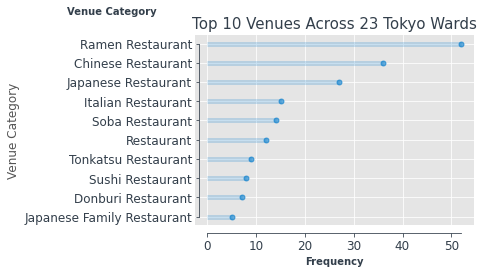

In [314]:
# set font
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# create some fake data
Frequency = pd.Series([52, 36, 27, 15, 14, 12, 9, 8, 7, 5], 
                        index=['Ramen Restaurant', 'Chinese Restaurant', 'Japanese Restaurant', 'Italian Restaurant', 'Soba Restaurant', 
                               'Restaurant', 'Tonkatsu Restaurant', 'Sushi Restaurant', 'Donburi Restaurant', 'Japanese Family Restaurant'])
df = pd.DataFrame({'Frequency' : Frequency})
df = df.sort_values(by='Frequency')

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=df['Frequency'], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df['Frequency'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Frequency', fontsize=10, fontweight='black', color = '#333F4B')

ax.set_ylabel('Venue Category')

plt.title('Top 10 Venues Across 23 Tokyo Wards', fontsize = 15)

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Venue Category', fontsize=10, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

plt.savefig('hist2.png', dpi=300, bbox_inches='tight')

In [315]:
print ("Shape of the Data-Frame with Restaurant Only Venue Category: ", tokyo_venues_restaurant.shape)
tokyo_venues_restaurant.head()

Shape of the Data-Frame with Restaurant Only Venue Category:  (272, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Chiyoda,35.69381,139.753216,Jimbocho Kurosu (神保町 黒須),35.695539,139.754851,Ramen Restaurant
2,Chiyoda,35.69381,139.753216,Kanda Tendonya (神田天丼家),35.695765,139.754682,Tempura Restaurant
3,Chiyoda,35.69381,139.753216,Sushi Masa (九段下 寿司政),35.695234,139.752227,Sushi Restaurant
4,Chiyoda,35.69381,139.753216,Bondy (欧風カレー ボンディ),35.695544,139.757356,Japanese Curry Restaurant
5,Chiyoda,35.69381,139.753216,たいよう軒,35.696454,139.754809,Chinese Restaurant


In [316]:
tokyo_restaurants = tokyo_venues_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [317]:
tokyo_restaurants

Neighborhood
Adachi         3
Arakawa        8
Bunkyō         3
Chiyoda       33
Edogawa        3
Itabashi       4
Katsushika     7
Kita          13
Kōtō           3
Meguro         5
Minato        10
Nakano         8
Nerima         1
Setagaya       8
Shibuya       21
Shinagawa      7
Shinjuku      33
Suginami      11
Sumida         9
Taitō         26
Toshima       16
Ōta           40
Name: Venue Category, dtype: int64

##### Analyze Each Ward

In [318]:
df_tokyo_restaurants  = tokyo_restaurants.to_frame().reset_index()
df_tokyo_restaurants.columns = ['Neighborhood', 'Number of Restaurant']
df_tokyo_restaurants.index = np.arange(1, len(df_tokyo_restaurants)+1)
list_rest_no =df_tokyo_restaurants['Number of Restaurant'].to_list()
list_dist =df_tokyo_restaurants['Neighborhood'].to_list()
#print (list_rest_no)
#print (list_dist)

In [360]:
# one hot encoding
tokyo_onehot = pd.get_dummies(tokyo_venues_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
tokyo_onehot['Neighborhood'] = tokyo_venues_restaurant['Neighborhood'] 

# move neighbourhood column to the first column
fixed_columns = [tokyo_onehot.columns[-1]] + list(tokyo_onehot.columns[:-1])
tokyo_onehot = tokyo_onehot[fixed_columns]

tokyo_onehot.head()

,Neighborhood,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Donburi Restaurant,Dongbei Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,...,Teishoku Restaurant,Tempura Restaurant,Thai Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
1,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Chiyoda,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [362]:
only_restaurant_count = tokyo_onehot.groupby('Neighborhood').count().reset_index().sum(axis=1)

tokyo_grouped = tokyo_onehot.groupby('Neighborhood').mean().reset_index()
tokyo_grouped 

,Neighborhood,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Donburi Restaurant,Dongbei Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,...,Teishoku Restaurant,Tempura Restaurant,Thai Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
0,Adachi,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,Arakawa,0.000000,0.000000,0.000000,0.250000,0.125000,0.0000,0.000000,0.000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,Bunkyō,0.000000,0.000000,0.000000,0.333333,0.000000,0.0000,0.000000,0.000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
3,Chiyoda,0.000000,0.000000,0.000000,0.121212,0.000000,0.0000,0.000000,0.000,0.090909,...,0.000,0.030303,0.030303,0.060606,0.000000,0.000000,0.000000,0.00,0.030303,0.030303
4,Edogawa,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,Itabashi,0.000000,0.000000,0.000000,0.500000,0.000000,0.0000,0.000000,0.000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
6,Katsushika,0.000000,0.000000,0.000000,0.000000,0.285714,0.0000,0.142857,0.000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,Kita,0.000000,0.000000,0.076923,0.000000,0.000000,0.0000,0.000000,0.000,0.076923,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.00,0.000000,0.000000
8,Kōtō,0.000000,0.000000,0.000000,0.666667,0.000000,0.0000,0.000000,0.000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
9,Meguro,0.000000,0.000000,0.000000,0.200000,0.000000,0.0000,0.000000,0.000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000


##### Print Each Neighborhood Along With the Top 3 Common Venues

In [366]:
num_top_venues = 3

for hood in tokyo_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = tokyo_grouped[tokyo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adachi----
                        venue  freq
0         Japanese Restaurant  0.67
1  Japanese Family Restaurant  0.33
2            Asian Restaurant  0.00


----Arakawa----
                venue  freq
0    Ramen Restaurant  0.25
1  Chinese Restaurant  0.25
2  Donburi Restaurant  0.12


----Bunkyō----
                 venue  freq
0   Italian Restaurant  0.33
1   Chinese Restaurant  0.33
2  Szechuan Restaurant  0.33


----Chiyoda----
                       venue  freq
0           Ramen Restaurant  0.18
1         Chinese Restaurant  0.12
2  Japanese Curry Restaurant  0.09


----Edogawa----
                 venue  freq
0     Ramen Restaurant  0.67
1   Italian Restaurant  0.33
2  Yakitori Restaurant  0.00


----Itabashi----
                        venue  freq
0          Chinese Restaurant  0.50
1          Italian Restaurant  0.25
2  Japanese Family Restaurant  0.25


----Katsushika----
                 venue  freq
0   Donburi Restaurant  0.29
1      Soba Restaurant  0.29
2  Dumpling Res

##### Create a New Dataframe and Display the Top 10 Venues for Each Ward

In [368]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['Neighborhood'] = tokyo_grouped['Neighborhood']

for ind in np.arange(tokyo_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tokyo_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Adachi,Japanese Restaurant,Japanese Family Restaurant,Asian Restaurant,Sushi Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South American Restaurant
1,Arakawa,Ramen Restaurant,Chinese Restaurant,Donburi Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Taiwanese Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant
2,Bunkyō,Italian Restaurant,Chinese Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South American Restaurant
3,Chiyoda,Ramen Restaurant,Chinese Restaurant,Japanese Curry Restaurant,French Restaurant,Restaurant,Indian Restaurant,Soba Restaurant,Japanese Restaurant,Tonkatsu Restaurant,Italian Restaurant
4,Edogawa,Ramen Restaurant,Italian Restaurant,Yakitori Restaurant,Vietnamese Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South American Restaurant
5,Itabashi,Chinese Restaurant,Italian Restaurant,Japanese Family Restaurant,Taiwanese Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant
6,Katsushika,Donburi Restaurant,Soba Restaurant,Dumpling Restaurant,Korean Restaurant,Ramen Restaurant,Asian Restaurant,Szechuan Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant
7,Kita,Restaurant,South American Restaurant,Cajun / Creole Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,French Restaurant,Asian Restaurant,Szechuan Restaurant,Russian Restaurant,Shabu-Shabu Restaurant
8,Kōtō,Chinese Restaurant,Indian Restaurant,Asian Restaurant,Szechuan Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South American Restaurant
9,Meguro,Japanese Restaurant,Italian Restaurant,Chinese Restaurant,Sushi Restaurant,Taiwanese Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South American Restaurant


In [408]:
districts_venues_sorted.rename(columns={"Neighborhood": "Ward"}, inplace=True)
districts_venues_sorted.head()

,ClusterLabel,Ward,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant,Cluster Labels,"(0, Cluster Labels)"
0,0,Adachi,Japanese Restaurant,Japanese Family Restaurant,Asian Restaurant,Sushi Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South American Restaurant,0,0
1,1,Arakawa,Ramen Restaurant,Chinese Restaurant,Donburi Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Taiwanese Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,1,1
2,2,Bunkyō,Italian Restaurant,Chinese Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South American Restaurant,2,2
3,1,Chiyoda,Ramen Restaurant,Chinese Restaurant,Japanese Curry Restaurant,French Restaurant,Restaurant,Indian Restaurant,Soba Restaurant,Japanese Restaurant,Tonkatsu Restaurant,Italian Restaurant,1,1
4,1,Edogawa,Ramen Restaurant,Italian Restaurant,Yakitori Restaurant,Vietnamese Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South American Restaurant,1,1


##### Run K-Means to Cluster the Neighborhood into 3 Clusters

In [421]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics  

X = tokyo_grouped.drop('Neighborhood', 1)

# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(init='k-means++', n_clusters=kclusters, random_state=0, n_init=12).fit(X)

# add clustering labels
districts_venues_sorted['Cluster Labels'] = kmeans.labels_

tokyo_merged = clean_tokyo_wards

# merge taipei_grouped with taipei_data to add latitude/longitude for each neighbourhood
tokyo_merged = tokyo_merged.join(districts_venues_sorted.set_index('Ward'), on='Ward')

In [422]:
tokyo_merged.head()

,No.,Ward,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Latitude,Longitude,ClusterLabel,1st Most Common Restaurant,...,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant,Cluster Labels,"(0, Cluster Labels)"
0,01,Chiyoda,千代田区,59441,5100,11.66,35.693810,139.753216,1,Ramen Restaurant,...,Japanese Curry Restaurant,French Restaurant,Restaurant,Indian Restaurant,Soba Restaurant,Japanese Restaurant,Tonkatsu Restaurant,Italian Restaurant,1,1
2,03,Minato,港区,248071,12180,20.37,35.643227,139.740055,1,Soba Restaurant,...,Yakitori Restaurant,Chinese Restaurant,French Restaurant,Kosher Restaurant,Indian Restaurant,Kebab Restaurant,Japanese Restaurant,Asian Restaurant,1,1
3,04,Shinjuku,新宿区,339211,18620,18.22,35.693763,139.703632,1,Ramen Restaurant,...,Chinese Restaurant,Shabu-Shabu Restaurant,Kushikatsu Restaurant,Tonkatsu Restaurant,Thai Restaurant,Russian Restaurant,Seafood Restaurant,Brazilian Restaurant,1,1
4,05,Bunkyō,文京区,223389,19790,11.29,35.718810,139.744732,2,Italian Restaurant,...,Szechuan Restaurant,Taiwanese Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South American Restaurant,2,2
5,06,Taitō,台東区,200486,19830,10.11,35.717450,139.790859,1,Ramen Restaurant,...,Sushi Restaurant,Italian Restaurant,Nabe Restaurant,Chinese Restaurant,Soba Restaurant,Sukiyaki Restaurant,South Indian Restaurant,Korean BBQ Restaurant,1,1


##### Visualize Clusters

In [423]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_merged['Latitude'], tokyo_merged['Longitude'], tokyo_merged['Ward'], tokyo_merged['ClusterLabel']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##### Examine Clusters

_***Cluster 1***_

In [425]:
tokyo_merged.loc[tokyo_merged['ClusterLabel'] == 0, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Ward,Area(km2),Latitude,Longitude,ClusterLabel,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant,Cluster Labels,"(0, Cluster Labels)"
6,Sumida,13.77,35.700429,139.805017,0,Japanese Restaurant,Chinese Restaurant,Ramen Restaurant,Sushi Restaurant,Unagi Restaurant,Tonkatsu Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,0,0
8,Shinagawa,22.84,35.599252,139.738910,0,Chinese Restaurant,Japanese Family Restaurant,Donburi Restaurant,Soba Restaurant,Sushi Restaurant,Japanese Restaurant,Asian Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,0,0
9,Meguro,14.67,35.621250,139.688014,0,Japanese Restaurant,Italian Restaurant,Chinese Restaurant,Sushi Restaurant,Taiwanese Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South American Restaurant,0,0
20,Adachi,53.25,35.783703,139.795319,0,Japanese Restaurant,Japanese Family Restaurant,Asian Restaurant,Sushi Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South American Restaurant,0,0


_***Cluster 2***_

In [426]:
tokyo_merged.loc[tokyo_merged['ClusterLabel'] == 1, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Ward,Area(km2),Latitude,Longitude,ClusterLabel,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant,Cluster Labels,"(0, Cluster Labels)"
0,Chiyoda,11.66,35.693810,139.753216,1,Ramen Restaurant,Chinese Restaurant,Japanese Curry Restaurant,French Restaurant,Restaurant,Indian Restaurant,Soba Restaurant,Japanese Restaurant,Tonkatsu Restaurant,Italian Restaurant,1,1
2,Minato,20.37,35.643227,139.740055,1,Soba Restaurant,Kaiseki Restaurant,Yakitori Restaurant,Chinese Restaurant,French Restaurant,Kosher Restaurant,Indian Restaurant,Kebab Restaurant,Japanese Restaurant,Asian Restaurant,1,1
3,Shinjuku,18.22,35.693763,139.703632,1,Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,Shabu-Shabu Restaurant,Kushikatsu Restaurant,Tonkatsu Restaurant,Thai Restaurant,Russian Restaurant,Seafood Restaurant,Brazilian Restaurant,1,1
5,Taitō,10.11,35.717450,139.790859,1,Ramen Restaurant,Japanese Restaurant,Sushi Restaurant,Italian Restaurant,Nabe Restaurant,Chinese Restaurant,Soba Restaurant,Sukiyaki Restaurant,South Indian Restaurant,Korean BBQ Restaurant,1,1
10,Ōta,60.66,35.561206,139.715843,1,Ramen Restaurant,Chinese Restaurant,Japanese Restaurant,Tonkatsu Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Udon Restaurant,Italian Restaurant,Korean Restaurant,Taiwanese Restaurant,1,1
11,Setagaya,58.05,35.646096,139.656270,1,Ramen Restaurant,Yoshoku Restaurant,Japanese Restaurant,Unagi Restaurant,Fast Food Restaurant,Szechuan Restaurant,Japanese Family Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,1,1
12,Shibuya,15.11,35.664596,139.698711,1,Ramen Restaurant,Chinese Restaurant,French Restaurant,Japanese Restaurant,Asian Restaurant,Italian Restaurant,Nabe Restaurant,Brazilian Restaurant,Mexican Restaurant,South Indian Restaurant,1,1
13,Nakano,15.59,35.718123,139.664468,1,Ramen Restaurant,Chinese Restaurant,Donburi Restaurant,Soba Restaurant,Tonkatsu Restaurant,Indian Restaurant,Italian Restaurant,Asian Restaurant,Szechuan Restaurant,Russian Restaurant,1,1
14,Suginami,34.06,35.699493,139.636288,1,Italian Restaurant,Chinese Restaurant,Soba Restaurant,Ramen Restaurant,Shabu-Shabu Restaurant,Dumpling Restaurant,Tonkatsu Restaurant,Szechuan Restaurant,Russian Restaurant,Seafood Restaurant,1,1
15,Toshima,13.01,35.736156,139.714222,1,Ramen Restaurant,Chinese Restaurant,Udon Restaurant,Middle Eastern Restaurant,Soba Restaurant,Korean Restaurant,Japanese Family Restaurant,Yoshoku Restaurant,Donburi Restaurant,Dongbei Restaurant,1,1


_***Cluster 3***_

In [427]:
tokyo_merged.loc[tokyo_merged['ClusterLabel'] == 3, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Ward,Area(km2),Latitude,Longitude,ClusterLabel,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant,Cluster Labels,"(0, Cluster Labels)"
7,Kōtō,40.16,35.649154,139.812790,3,Chinese Restaurant,Indian Restaurant,Asian Restaurant,Szechuan Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South American Restaurant,2,3
19,Nerima,48.08,35.748360,139.638735,3,Chinese Restaurant,Asian Restaurant,Szechuan Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,2,3


##### Create a Visualization of the Number of Ramen Restaurants in Different Wards

We can observe from the cluster analysis that Ramen restaurants are the most popular restaurant venues in Tokyo (followed by more general Japanese restaurants and Chinese restaurants). I create a bar graph in order to better observe the concentration of Ramen restaurants in each of the 23 wards. 

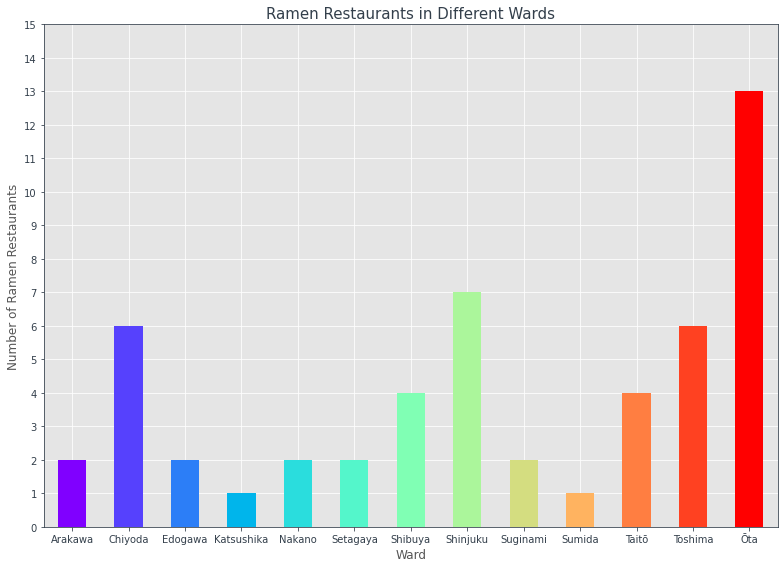

In [448]:
ramen_tokyo = tokyo_venues[tokyo_venues['Venue Category'].str.contains('Ramen Restaurant')].groupby('Neighborhood').count()
ramen_tokyo = ramen_tokyo['Venue Category']

# Assign color for each category
x = np.arange(len(ramen_tokyo))
ys = [i + x + (i*x)**2 for i in range(len(ramen_tokyo))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

ramen_tokyo.plot(kind='bar', figsize=(11,8), color=rainbow )

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.xlabel('Ward', fontsize=12) # add to x-label to the plot
plt.xticks(rotation=0)
plt.ylabel('Number of Ramen Restaurants', fontsize=12) # add y-label to the plot
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.title('Ramen Restaurants in Different Wards', fontsize=15)
plt.tight_layout()
plt.show()

## Discussion of Part 1's Findings 

_***Main Findings:***_

My main findings from the exploratory analysis of popular restaurant venues in Tokyo highlighted the frequency of visits to **Ramen restaurants**. After Ramen restaurants, the clustering results additionally showed that general Japanese restaurants (i.e. restaurants that might offer both Ramen and/or non-Ramen dishes such as Katsu-Don and Yakitori) and Chinese restaurants were among the popular dine-out venues. Further analysis of ramen restaurants showed that these venues are mostly concentrated in Ota Ward, followed by Shinjuku, Chiyoda, Toshima, and Shibuya. 

_***Limitations:***_

* The Foursquare data should also be observed with some caution; it should be pointed out that there may be more Ramen restaurants that may have not been mentioned or "checked-in" by Foursquare users that might lead to an undercounting of some of these restaurants across Tokyo. 

* Foursquare could not retrieve data on each restaurant's menus, which limits our understanding of what selection or dishes they have to offer.

* Because we only looked at most frequently visited types of restaurants, the ratings of each restaurant's food quality which could have provided the client with more specific insights were outside the scope of this study. 

## Recommendations 

* The client should focus his or her food tours on finding the most thrilling Ramen restaurant experience.

* The client should seek out Ramen spots in the following wards: Ota, Shinjuku, Chiyoda, Toshima, and Shibuya. 

![title](tonkatsu_ramen.jpg)

# _**----- END OF PART 1 ANALYSIS -----**_

# Part 2: Mapping Celebrity Visits to Tokyo (And Where They Dined)

##### Open CSV File from Kaggle and Create a Dataframe Called celeb_data

In [452]:
df_celeb = pd.read_csv("celeb_data.csv")
df_celeb.head()

,Celebrity,Type,Establishment,Location,Ward,Type.1,Month
0,Asap Rocky,Musician,1 OAK TOKYO,Roppongi,Minato-ku,Club,October
1,Bella Hadid,Model,1 OAK TOKYO,Roppongi,Minato-ku,Club,April
2,Halsey,Musician,1 OAK TOKYO,Roppongi,Minato-ku,Club,October
3,Liam Payne,Musician,1 OAK TOKYO,Roppongi,Minato-ku,Club,March
4,Tyga,Musician,1 OAK TOKYO,Roppongi,Minato-ku,Club,September


In [454]:
df_celeb.rename(columns={"Type.1": "Venue"}, inplace=True)
df_celeb

,Celebrity,Type,Establishment,Location,Ward,Venue,Month
0,Asap Rocky,Musician,1 OAK TOKYO,Roppongi,Minato-ku,Club,October
1,Bella Hadid,Model,1 OAK TOKYO,Roppongi,Minato-ku,Club,April
2,Halsey,Musician,1 OAK TOKYO,Roppongi,Minato-ku,Club,October
3,Liam Payne,Musician,1 OAK TOKYO,Roppongi,Minato-ku,Club,March
4,Tyga,Musician,1 OAK TOKYO,Roppongi,Minato-ku,Club,September
...,...,...,...,...,...,...,...
351,Rihanna,Musician,Yoyogi National Stadium,Yoyogi,Shibuya-ku,Landmark,April
352,Conan O'Brien,TV Personality,Yoyogi Park,Yoyogi,Shibuya-ku,Park,September
353,Matt Bellamy,Musician,Yumenoya Kimono Rental,Asakusa,Taito-ku,Shopping,November
354,Shawn Mendez,Musician,zero Tokyo,Ginza,Chuo-ku,Restaurant,February


##### Filter Out Venues That Are Only Restaurants

In [473]:
df_is_restaurant = df_celeb['Venue']=='Restaurant'
print(df_is_restaurant.head())

0    False
1    False
2    False
3    False
4    False
Name: Venue, dtype: bool


In [476]:
df_celeb_restaurant = df_celeb[df_is_restaurant]
print(df_celeb_restaurant.shape)

(126, 7)


In [478]:
df_celeb_restaurant

,Celebrity,Type,Establishment,Location,Ward,Venue,Month
14,Camilla Belle,Actor,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,April
15,Pharrell Williams,Musician,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,August
22,Heidi Klum,Model,Aoi Marushin,Asakusa,Taitō-ku,Restaurant,April
23,Camilla Belle,Actor,Appia Alta,Nishi-Azabu,Minato-ku,Restaurant,April
24,Kate Hudson,Actor,Aronia De Takazawa,Akasaka,Minato-ku,Restaurant,November
...,...,...,...,...,...,...,...
335,Rihanna,Musician,Tsukiji Fish Market,Tsukiji,Chuo-ku,Restaurant,NaN
337,David Beckham,Athlete,Umi,Omotesando,Minato-ku,Restaurant,May
344,Anthony Bourdain,TV Personality,XEX Morimoto,Roppongi,Minato-ku,Restaurant,NaN
347,Aziz Ansari,Actor,Yakumo Saryo,Meguro,Meguro-ku,Restaurant,May


##### Obtain the Longitude and Latitude of Each Location (Within a Ward)

In [482]:
df_celeb_restaurant['city_coord'] = df_celeb_restaurant['Location'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df_celeb_restaurant

C:\Users\chonlawit.sirikupt\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Celebrity,Type,Establishment,Location,Ward,Venue,Month,city_coord
14,Camilla Belle,Actor,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,April,"(35.6687049, 139.7053357)"
15,Pharrell Williams,Musician,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,August,"(35.6687049, 139.7053357)"
22,Heidi Klum,Model,Aoi Marushin,Asakusa,Taitō-ku,Restaurant,April,"(35.7175966, 139.7975626)"
23,Camilla Belle,Actor,Appia Alta,Nishi-Azabu,Minato-ku,Restaurant,April,"(35.6598689, 139.7246876)"
24,Kate Hudson,Actor,Aronia De Takazawa,Akasaka,Minato-ku,Restaurant,November,"(35.6716786, 139.7356224)"
...,...,...,...,...,...,...,...,...
335,Rihanna,Musician,Tsukiji Fish Market,Tsukiji,Chuo-ku,Restaurant,NaN,"(35.668101, 139.7725834)"
337,David Beckham,Athlete,Umi,Omotesando,Minato-ku,Restaurant,May,"(35.6651701, 139.7124352)"
344,Anthony Bourdain,TV Personality,XEX Morimoto,Roppongi,Minato-ku,Restaurant,NaN,"(35.6624568, 139.7334981)"
347,Aziz Ansari,Actor,Yakumo Saryo,Meguro,Meguro-ku,Restaurant,May,"(35.62125, 139.688014)"


In [484]:
df_celeb_restaurant[['Latitude', 'Longitude']] = df_celeb_restaurant['city_coord'].apply(pd.Series)

df_celeb_restaurant.drop(['city_coord'], axis=1, inplace=True)
df_celeb_restaurant

C:\Users\chonlawit.sirikupt\anaconda3\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\chonlawit.sirikupt\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Celebrity,Type,Establishment,Location,Ward,Venue,Month,Latitude,Longitude
14,Camilla Belle,Actor,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,April,35.668705,139.705336
15,Pharrell Williams,Musician,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,August,35.668705,139.705336
22,Heidi Klum,Model,Aoi Marushin,Asakusa,Taitō-ku,Restaurant,April,35.717597,139.797563
23,Camilla Belle,Actor,Appia Alta,Nishi-Azabu,Minato-ku,Restaurant,April,35.659869,139.724688
24,Kate Hudson,Actor,Aronia De Takazawa,Akasaka,Minato-ku,Restaurant,November,35.671679,139.735622
...,...,...,...,...,...,...,...,...,...
335,Rihanna,Musician,Tsukiji Fish Market,Tsukiji,Chuo-ku,Restaurant,NaN,35.668101,139.772583
337,David Beckham,Athlete,Umi,Omotesando,Minato-ku,Restaurant,May,35.665170,139.712435
344,Anthony Bourdain,TV Personality,XEX Morimoto,Roppongi,Minato-ku,Restaurant,NaN,35.662457,139.733498
347,Aziz Ansari,Actor,Yakumo Saryo,Meguro,Meguro-ku,Restaurant,May,35.621250,139.688014


##### See the Resulting Dataframe df_celeb_restaurant

In [507]:
df_celeb_restaurant.head(50)

,Celebrity,Type,Establishment,Location,Ward,Venue,Month,Latitude,Longitude
14,Camilla Belle,Actor,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,April,35.668705,139.705336
15,Pharrell Williams,Musician,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,August,35.668705,139.705336
22,Heidi Klum,Model,Aoi Marushin,Asakusa,Taitō-ku,Restaurant,April,35.717597,139.797563
23,Camilla Belle,Actor,Appia Alta,Nishi-Azabu,Minato-ku,Restaurant,April,35.659869,139.724688
24,Kate Hudson,Actor,Aronia De Takazawa,Akasaka,Minato-ku,Restaurant,November,35.671679,139.735622
35,Aziz Ansari,Actor,Birdland,Ginza,Chuo-ku,Restaurant,December,35.670910,139.766021
38,Ian Ziering,Actor,Bubby's New York ARK Hills,Roppongi,Minato-ku,Restaurant,March,35.662457,139.733498
42,Anthony Bourdain,TV Personality,Chanko Kuroshio,Kagurazaka,Shinjuku-ku,Restaurant,NaN,35.703930,139.734135
47,Anthony Bourdain,TV Personality,Daitoryo,Ueno,Taitō-ku,Restaurant,NaN,35.711821,139.777569
48,Kristen Stewart,Actor,Daiwa Sushi,Tsukiji,Chuo-ku,Restaurant,July,35.668101,139.772583


##### Visualize Locations in Tokyo Where Celebrities Visited

In [489]:
map_tokyo_celeb = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(df_celeb_restaurant['Latitude'], df_celeb_restaurant['Longitude'], df_celeb_restaurant['Location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1,
        parse_html=False).add_to(map_tokyo_celeb) 
    
map_tokyo_celeb

##### Explore Shinjuku Ward as a Vector for Understanding Celebrity Visits 

In [513]:
celeb_restaurant_shinjuku = df_celeb_restaurant.groupby(['Celebrity'])['Ward'].apply(lambda x: x[x.str.contains('Shinjuku-ku')].count())

In [515]:
celeb_restaurant_shinjuku.head()

Celebrity
Ali Larter          0
Anne Hathaway       0
Ansel Elgort        1
Anthony Bourdain    3
Ariana Grande       0
Name: Ward, dtype: int64

In [518]:
df_celeb_shinjuku  = celeb_restaurant_shinjuku.to_frame().reset_index()
df_celeb_shinjuku.columns = ['Celebrity', 'Visits']
df_celeb_shinjuku.index = np.arange(1, len(df_celeb_shinjuku)+1)
list_rest_no_1 =df_celeb_shinjuku['Visits'].to_list()
list_dist_1 =df_celeb_shinjuku['Celebrity'].to_list()
#print (list_rest_no)
#print (list_dist)

##### Analyze Each Location of Celebrity Visits

In [533]:
# one hot encoding
tokyo_onehot_celeb = pd.get_dummies(df_celeb_restaurant[['Celebrity']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
tokyo_onehot_celeb['Location'] = df_celeb_restaurant['Location'] 

# move neighbourhood column to the first column
fixed_columns_1 = [tokyo_onehot_celeb.columns[-1]] + list(tokyo_onehot_celeb.columns[:-1])
tokyo_onehot_celeb = tokyo_onehot_celeb[fixed_columns_1]

tokyo_onehot_celeb.head()

,Location,Ali Larter,Anne Hathaway,Ansel Elgort,Anthony Bourdain,Ariana Grande,Arnold Schwarzenegger,Ashton Kutcher,Aziz Ansari,Barack Obama,...,Shay Mitchell,Steven Spielberg,Steven Tyler,Sting,The Weeknd,Tim Burton,Tom Cruise,Tom Hanks,Tony Hawk,Zedd
14,Harajuku,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,Harajuku,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,Asakusa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,Nishi-Azabu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,Akasaka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [534]:
only_celeb_visit = tokyo_onehot_celeb.groupby('Location').count().reset_index().sum(axis=1)

tokyo_celeb_grouped = tokyo_onehot_celeb.groupby('Location').mean().reset_index()
tokyo_celeb_grouped 

,Location,Ali Larter,Anne Hathaway,Ansel Elgort,Anthony Bourdain,Ariana Grande,Arnold Schwarzenegger,Ashton Kutcher,Aziz Ansari,Barack Obama,...,Shay Mitchell,Steven Spielberg,Steven Tyler,Sting,The Weeknd,Tim Burton,Tom Cruise,Tom Hanks,Tony Hawk,Zedd
0,Akasaka,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.20,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
1,Akihabara,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000
2,Aoyama,0.000000,0.00,0.000000,0.200000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
3,Asakusa,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,Ebisu,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
5,Edogawabashi,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,1.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
6,Ginza,0.000000,0.05,0.000000,0.050000,0.000000,0.05,0.000000,0.100000,0.050000,...,0.000000,0.05,0.000,0.000000,0.000000,0.000000,0.050000,0.0,0.0,0.000000
7,Harajuku,0.045455,0.00,0.000000,0.000000,0.045455,0.00,0.000000,0.000000,0.000000,...,0.045455,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.045455
8,Hatanodai,0.000000,0.00,0.000000,1.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
9,Kagurazaka,0.000000,0.00,0.000000,1.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


##### Print Each Location Along With the Top 3 Common Celebrities

In [535]:
num_top_venues = 3

for hood in tokyo_celeb_grouped['Location']:
    print("----"+hood+"----")
    temp = tokyo_celeb_grouped[tokyo_celeb_grouped['Location'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Akasaka----
               venue  freq
0  Pharrell Williams   0.2
1        Kate Hudson   0.2
2  Samuel L. Jackson   0.2


----Akihabara----
        venue  freq
0   Tom Hanks   1.0
1  Ali Larter   0.0
2       Lorde   0.0


----Aoyama----
              venue  freq
0  Anthony Bourdain   0.2
1            G-Eazy   0.2
2     Holly Madison   0.2


----Asakusa----
            venue  freq
0      Heidi Klum   1.0
1      Ali Larter   0.0
2  Julianne Moore   0.0


----Ebisu----
          venue  freq
0  Keanu Reeves   1.0
1    Ali Larter   0.0
2         Lorde   0.0


----Edogawabashi----
          venue  freq
0  Steven Tyler   1.0
1    Ali Larter   0.0
2         Lorde   0.0


----Ginza----
            venue  freq
0  Milla Jovovich  0.10
1     Aziz Ansari  0.10
2       Lucy Hale  0.05


----Harajuku----
            venue  freq
0  Kim Kardashian  0.09
1      Ali Larter  0.05
2    Chloe Moretz  0.05


----Hatanodai----
              venue  freq
0  Anthony Bourdain   1.0
1        Ali Larter   0.0
2

##### Create a New Dataframe and Display the Top 10 Celebrities for Each Location

In [539]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Celebrity'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Celebrity'.format(ind+1))

# create a new dataframe
celeb_districts_venues_sorted = pd.DataFrame(columns=columns)
celeb_districts_venues_sorted['Location'] = tokyo_celeb_grouped['Location']

for ind in np.arange(tokyo_celeb_grouped.shape[0]):
    celeb_districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tokyo_celeb_grouped.iloc[ind, :], num_top_venues)

celeb_districts_venues_sorted

,Location,1st Most Common Celebrity,2nd Most Common Celebrity,3rd Most Common Celebrity,4th Most Common Celebrity,5th Most Common Celebrity,6th Most Common Celebrity,7th Most Common Celebrity,8th Most Common Celebrity,9th Most Common Celebrity,10th Most Common Celebrity
0,Akasaka,Pharrell Williams,Kate Hudson,Samuel L. Jackson,Lady GaGa,Steven Spielberg,Lucy Hale,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon
1,Akihabara,Tom Hanks,Ali Larter,Lorde,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale
2,Aoyama,Anthony Bourdain,G-Eazy,Holly Madison,Camilla Belle,Hugh Jackman,Ali Larter,Matt Damon,Nicolas Cage,Nicholas Hoult,Nicholas Cage
3,Asakusa,Heidi Klum,Ali Larter,Julianne Moore,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale
4,Ebisu,Keanu Reeves,Ali Larter,Lorde,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale
5,Edogawabashi,Steven Tyler,Ali Larter,Lorde,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale
6,Ginza,Milla Jovovich,Aziz Ansari,Lucy Hale,Anne Hathaway,Hugh Jackman,Drew Barrymore,David Beckham,Nicholas Cage,Jodie Foster,Shawn Mendez
7,Harajuku,Kim Kardashian,Ali Larter,Chloe Moretz,Shay Mitchell,Selena Gomez,Pharrell Williams,Paul McCartney,Lorde,Kourtney Kardashian,Justin Bieber
8,Hatanodai,Anthony Bourdain,Ali Larter,Lorde,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale
9,Kagurazaka,Anthony Bourdain,Ali Larter,Lorde,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale


##### Cluster Locations

_**Run K-Means to Cluster the Location of Celebrity Visits to 3 Clusters**_

In [601]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics  

X = tokyo_celeb_grouped.drop('Location', 1)

# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(init='k-means++', n_clusters=kclusters, random_state=0, n_init=12).fit(X)

# add clustering labels
celeb_districts_venues_sorted['Cluster_Labels'] = kmeans.labels_

tokyo_celeb_merged = df_celeb_restaurant

# merge taipei_grouped with taipei_data to add latitude/longitude for each neighbourhood
tokyo_celeb_merged = tokyo_celeb_merged.join(celeb_districts_venues_sorted.set_index('Location'), on='Location')

In [602]:
tokyo_celeb_merged.head()

,Celebrity,Type,Establishment,Location,Ward,Venue,Month,Latitude,Longitude,1st Most Common Celebrity,...,3rd Most Common Celebrity,4th Most Common Celebrity,5th Most Common Celebrity,6th Most Common Celebrity,7th Most Common Celebrity,8th Most Common Celebrity,9th Most Common Celebrity,10th Most Common Celebrity,Cluster Labels,Cluster_Labels
14,Camilla Belle,Actor,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,April,35.668705,139.705336,Kim Kardashian,...,Chloe Moretz,Shay Mitchell,Selena Gomez,Pharrell Williams,Paul McCartney,Lorde,Kourtney Kardashian,Justin Bieber,0.0,0.0
15,Pharrell Williams,Musician,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,August,35.668705,139.705336,Kim Kardashian,...,Chloe Moretz,Shay Mitchell,Selena Gomez,Pharrell Williams,Paul McCartney,Lorde,Kourtney Kardashian,Justin Bieber,0.0,0.0
22,Heidi Klum,Model,Aoi Marushin,Asakusa,Taitō-ku,Restaurant,April,35.717597,139.797563,Heidi Klum,...,Julianne Moore,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale,2.0,2.0
23,Camilla Belle,Actor,Appia Alta,Nishi-Azabu,Minato-ku,Restaurant,April,35.659869,139.724688,Camilla Belle,...,Johnny Depp,Jodie Sweetin,Quentin Tarantino,Steven Tyler,Lady GaGa,Scott Weinger,Ali Larter,Nicholas Hoult,0.0,0.0
24,Kate Hudson,Actor,Aronia De Takazawa,Akasaka,Minato-ku,Restaurant,November,35.671679,139.735622,Pharrell Williams,...,Samuel L. Jackson,Lady GaGa,Steven Spielberg,Lucy Hale,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,0.0,0.0


In [603]:
tokyo_celeb_merged.drop(['Celebrity', 'Cluster Labels', 'Type'], axis=1, inplace=True)

In [622]:
tokyo_celeb_merged

,index,Establishment,Location,Ward,Venue,Month,Latitude,Longitude,1st Most Common Celebrity,2nd Most Common Celebrity,3rd Most Common Celebrity,4th Most Common Celebrity,5th Most Common Celebrity,6th Most Common Celebrity,7th Most Common Celebrity,8th Most Common Celebrity,9th Most Common Celebrity,10th Most Common Celebrity,Cluster_Labels
0,14,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,April,35.668705,139.705336,Kim Kardashian,Ali Larter,Chloe Moretz,Shay Mitchell,Selena Gomez,Pharrell Williams,Paul McCartney,Lorde,Kourtney Kardashian,Justin Bieber,0.0
1,15,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,August,35.668705,139.705336,Kim Kardashian,Ali Larter,Chloe Moretz,Shay Mitchell,Selena Gomez,Pharrell Williams,Paul McCartney,Lorde,Kourtney Kardashian,Justin Bieber,0.0
2,22,Aoi Marushin,Asakusa,Taitō-ku,Restaurant,April,35.717597,139.797563,Heidi Klum,Ali Larter,Julianne Moore,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale,2.0
3,23,Appia Alta,Nishi-Azabu,Minato-ku,Restaurant,April,35.659869,139.724688,Camilla Belle,Anthony Bourdain,Johnny Depp,Jodie Sweetin,Quentin Tarantino,Steven Tyler,Lady GaGa,Scott Weinger,Ali Larter,Nicholas Hoult,0.0
4,24,Aronia De Takazawa,Akasaka,Minato-ku,Restaurant,November,35.671679,139.735622,Pharrell Williams,Kate Hudson,Samuel L. Jackson,Lady GaGa,Steven Spielberg,Lucy Hale,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,335,Tsukiji Fish Market,Tsukiji,Chuo-ku,Restaurant,NaN,35.668101,139.772583,Josh Groban,Kristen Stewart,Drew Barrymore,Nicholas Hoult,Rihanna,Jeff Bezos,Ian Ziering,Kourtney Kardashian,Lady GaGa,Leonardo DiCaprio,0.0
122,337,Umi,Omotesando,Minato-ku,Restaurant,May,35.665170,139.712435,David Beckham,Julianne Moore,Paul McCartney,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale,0.0
123,344,XEX Morimoto,Roppongi,Minato-ku,Restaurant,NaN,35.662457,139.733498,Aziz Ansari,Demi Moore,Cameron Diaz,Lady GaGa,Margot Robbie,Matt Damon,Ian Ziering,Nicolas Cage,Red Zeppelin,Drew Barrymore,0.0
124,347,Yakumo Saryo,Meguro,Meguro-ku,Restaurant,May,35.621250,139.688014,Shay Mitchell,Anthony Bourdain,Aziz Ansari,Ali Larter,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,0.0


In [641]:
tokyo_celeb_merged['Cluster_Labels'] = tokyo_celeb_merged['Cluster_Labels'].fillna(0).astype(int)

##### See Resulting Dataframe tokyo_celeb_merged

In [642]:
tokyo_celeb_merged

,index,Establishment,Location,Ward,Venue,Month,Latitude,Longitude,1st Most Common Celebrity,2nd Most Common Celebrity,3rd Most Common Celebrity,4th Most Common Celebrity,5th Most Common Celebrity,6th Most Common Celebrity,7th Most Common Celebrity,8th Most Common Celebrity,9th Most Common Celebrity,10th Most Common Celebrity,Cluster_Labels
0,14,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,April,35.668705,139.705336,Kim Kardashian,Ali Larter,Chloe Moretz,Shay Mitchell,Selena Gomez,Pharrell Williams,Paul McCartney,Lorde,Kourtney Kardashian,Justin Bieber,0
1,15,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,August,35.668705,139.705336,Kim Kardashian,Ali Larter,Chloe Moretz,Shay Mitchell,Selena Gomez,Pharrell Williams,Paul McCartney,Lorde,Kourtney Kardashian,Justin Bieber,0
2,22,Aoi Marushin,Asakusa,Taitō-ku,Restaurant,April,35.717597,139.797563,Heidi Klum,Ali Larter,Julianne Moore,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale,2
3,23,Appia Alta,Nishi-Azabu,Minato-ku,Restaurant,April,35.659869,139.724688,Camilla Belle,Anthony Bourdain,Johnny Depp,Jodie Sweetin,Quentin Tarantino,Steven Tyler,Lady GaGa,Scott Weinger,Ali Larter,Nicholas Hoult,0
4,24,Aronia De Takazawa,Akasaka,Minato-ku,Restaurant,November,35.671679,139.735622,Pharrell Williams,Kate Hudson,Samuel L. Jackson,Lady GaGa,Steven Spielberg,Lucy Hale,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,335,Tsukiji Fish Market,Tsukiji,Chuo-ku,Restaurant,NaN,35.668101,139.772583,Josh Groban,Kristen Stewart,Drew Barrymore,Nicholas Hoult,Rihanna,Jeff Bezos,Ian Ziering,Kourtney Kardashian,Lady GaGa,Leonardo DiCaprio,0
122,337,Umi,Omotesando,Minato-ku,Restaurant,May,35.665170,139.712435,David Beckham,Julianne Moore,Paul McCartney,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale,0
123,344,XEX Morimoto,Roppongi,Minato-ku,Restaurant,NaN,35.662457,139.733498,Aziz Ansari,Demi Moore,Cameron Diaz,Lady GaGa,Margot Robbie,Matt Damon,Ian Ziering,Nicolas Cage,Red Zeppelin,Drew Barrymore,0
124,347,Yakumo Saryo,Meguro,Meguro-ku,Restaurant,May,35.621250,139.688014,Shay Mitchell,Anthony Bourdain,Aziz Ansari,Ali Larter,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,0


##### Examine Clusters

_**Cluster 1**_

In [643]:
tokyo_celeb_merged.loc[tokyo_celeb_merged['Cluster_Labels'] == 0.0, tokyo_celeb_merged.columns[[1] + list(range(2, tokyo_celeb_merged.shape[1]))]]

,Establishment,Location,Ward,Venue,Month,Latitude,Longitude,1st Most Common Celebrity,2nd Most Common Celebrity,3rd Most Common Celebrity,4th Most Common Celebrity,5th Most Common Celebrity,6th Most Common Celebrity,7th Most Common Celebrity,8th Most Common Celebrity,9th Most Common Celebrity,10th Most Common Celebrity,Cluster_Labels
0,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,April,35.668705,139.705336,Kim Kardashian,Ali Larter,Chloe Moretz,Shay Mitchell,Selena Gomez,Pharrell Williams,Paul McCartney,Lorde,Kourtney Kardashian,Justin Bieber,0
1,Afuri Ramen,Harajuku,Shibuya-ku,Restaurant,August,35.668705,139.705336,Kim Kardashian,Ali Larter,Chloe Moretz,Shay Mitchell,Selena Gomez,Pharrell Williams,Paul McCartney,Lorde,Kourtney Kardashian,Justin Bieber,0
3,Appia Alta,Nishi-Azabu,Minato-ku,Restaurant,April,35.659869,139.724688,Camilla Belle,Anthony Bourdain,Johnny Depp,Jodie Sweetin,Quentin Tarantino,Steven Tyler,Lady GaGa,Scott Weinger,Ali Larter,Nicholas Hoult,0
4,Aronia De Takazawa,Akasaka,Minato-ku,Restaurant,November,35.671679,139.735622,Pharrell Williams,Kate Hudson,Samuel L. Jackson,Lady GaGa,Steven Spielberg,Lucy Hale,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,0
5,Birdland,Ginza,Chuo-ku,Restaurant,December,35.670910,139.766021,Milla Jovovich,Aziz Ansari,Lucy Hale,Anne Hathaway,Hugh Jackman,Drew Barrymore,David Beckham,Nicholas Cage,Jodie Foster,Shawn Mendez,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Tsukiji Fish Market,Tsukiji,Chuo-ku,Restaurant,NaN,35.668101,139.772583,Josh Groban,Kristen Stewart,Drew Barrymore,Nicholas Hoult,Rihanna,Jeff Bezos,Ian Ziering,Kourtney Kardashian,Lady GaGa,Leonardo DiCaprio,0
122,Umi,Omotesando,Minato-ku,Restaurant,May,35.665170,139.712435,David Beckham,Julianne Moore,Paul McCartney,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale,0
123,XEX Morimoto,Roppongi,Minato-ku,Restaurant,NaN,35.662457,139.733498,Aziz Ansari,Demi Moore,Cameron Diaz,Lady GaGa,Margot Robbie,Matt Damon,Ian Ziering,Nicolas Cage,Red Zeppelin,Drew Barrymore,0
124,Yakumo Saryo,Meguro,Meguro-ku,Restaurant,May,35.621250,139.688014,Shay Mitchell,Anthony Bourdain,Aziz Ansari,Ali Larter,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,0


_**Cluster 2**_

In [644]:
tokyo_celeb_merged.loc[tokyo_celeb_merged['Cluster_Labels'] == 1.0, tokyo_celeb_merged.columns[[1] + list(range(2, tokyo_celeb_merged.shape[1]))]]

,Establishment,Location,Ward,Venue,Month,Latitude,Longitude,1st Most Common Celebrity,2nd Most Common Celebrity,3rd Most Common Celebrity,4th Most Common Celebrity,5th Most Common Celebrity,6th Most Common Celebrity,7th Most Common Celebrity,8th Most Common Celebrity,9th Most Common Celebrity,10th Most Common Celebrity,Cluster_Labels
7,Chanko Kuroshio,Kagurazaka,Shinjuku-ku,Restaurant,NaN,35.703930,139.734135,Anthony Bourdain,Ali Larter,Lorde,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale,1
8,Daitoryo,Ueno,Taitō-ku,Restaurant,NaN,35.711821,139.777569,Anthony Bourdain,Ali Larter,Lorde,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale,1
117,Toriki,Hatanodai,Shinagawa-ku,Restaurant,NaN,35.604876,139.702668,Anthony Bourdain,Ali Larter,Lorde,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale,1


_**Cluster 3**_

In [645]:
tokyo_celeb_merged.loc[tokyo_celeb_merged['Cluster_Labels'] == 2.0, tokyo_celeb_merged.columns[[1] + list(range(2, tokyo_celeb_merged.shape[1]))]]

,Establishment,Location,Ward,Venue,Month,Latitude,Longitude,1st Most Common Celebrity,2nd Most Common Celebrity,3rd Most Common Celebrity,4th Most Common Celebrity,5th Most Common Celebrity,6th Most Common Celebrity,7th Most Common Celebrity,8th Most Common Celebrity,9th Most Common Celebrity,10th Most Common Celebrity,Cluster_Labels
2,Aoi Marushin,Asakusa,Taitō-ku,Restaurant,April,35.717597,139.797563,Heidi Klum,Ali Larter,Julianne Moore,Nicolas Cage,Nicholas Hoult,Nicholas Cage,Milla Jovovich,Matt Damon,Margot Robbie,Lucy Hale,2


From the clustering analysis we can  make an inference that most celebrities such as Kim Kardashian went to venues that were mostly in big and popular entertainment districts that are usually packed with people (i.e. Shinjuku and Shibuya). Not that many celebrities went to venues far away from these centers except for Anthony Bourdain and Heidi Klum. It is understandable why Anthony Bourdain seems to be an exception to the rule given that his TV program focuses on exploring local cultures and their best kept secrets.

##### Visualize Clusters

In [646]:
map_clusters_celeb = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_celeb_merged['Latitude'], tokyo_celeb_merged['Longitude'], tokyo_celeb_merged['Location'], tokyo_celeb_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_celeb)
       
map_clusters_celeb

# Discussion of Part 2's Findings

_***Main Findings:***_

My main findings from the clustering analysis of popular celebrity venues in Tokyo shows that they tend to be concentrated in major entertainment districts such as Shinjuku and Shibuya. As Cluster 2 and 3 indicate, Anthony Bourdain and Heidi Klum were exceptions to the rule; they went to relatively suburban venues around the edges of central Tokyo such as Ueno, Asakusa, and Hatanodai. We might speculate why Bourdain preferred these venus based on the fact that his TV program focuses on exploring local cultures and their best kept secrets.

_***Limitations:***_

* ! This analysis only focused on the 1st most common celebrity who visited the venues given that many of the values for the 2nd to 10th most common celebrity in every cluster were actually 0 (meaning that they never visited these locations). I set the number of most common celebrity to 10 to see how the data would look like if our dataset on celebrity visits was larger than the current one. 

* Because this exploratory analysis sought out to map out locations where the celebrities had dined during their stay in Tokyo, it left out analyses of the menus (i.e. price) and the ratings of each restaurant's food quality.

## Recommendations

* The client should diversify his or her food tour experience in ways that complement the hunt for the most fulfilling ramen by selecting additional venues where prominent celebrities have dined out. This would be added value for the client given that celebrities have a huge following. The client should conduct additional research on which celebrities best align with his or her target niche so that they would be attracted to joining the tour. 

* The client should select venues that are both in major entertainment districts and suburban areas to maximize the flavor and character of the food tour. 

# _**----- END OF PART 2 ANALYSIS -----**_

# Summary of Recommendations for Client

* The client should focus his or her food tours on finding the most thrilling Ramen restaurant experience.

* The client should seek out Ramen spots in the following wards: Ota, Shinjuku, Chiyoda, Toshima, and Shibuya. 
    
* The client should diversify his or her food tour experience in ways that complement the hunt for the most fulfilling ramen by selecting additional venues where prominent celebrities have dined out. This would be added value for the client given that celebrities have a huge following. Going forward, the client should conduct additional research on which celebrities best align with his or her target niche so that they would be attracted to joining the tour. 

* The client should select venues that are both in major entertainment districts and suburban areas to maximize the flavor and character of the food tour. 

# _**----- END OF PROJECT -----**_